<a href="https://colab.research.google.com/github/Limekaaa/Predictive_House_Price_Model/blob/main/Artificial_Intelligence_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI and applications

## Library importations

In [ ]:
#!pip install xgboost

import pandas as pd
import plotly.express as px
import xgboost as xgb
import numpy as np

## Data Loading

In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [ ]:
#RUN FROM HERE
test_dataset = test
train_dataset = train
#so that we don't need to re-download the data everytime.

# Preprocessing

# Exploratry Data Analysis (EDA)




In [ ]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
print(train_dataset.shape)

(1460, 81)


In [ ]:
print(test_dataset.shape)

(1459, 80)


- Taking out the rows with no target (SalePrice) in the train dataset only, as the test datasets obviously doesn't have target values

In [ ]:
target = 'SalePrice'
# remove rows where target is null or zero
train_dataset = train_dataset[(train_dataset[target].notnull()) & (train_dataset[target] != 0)]
# reset index after removing rows
train_dataset.reset_index(drop=True, inplace=True)
# modified train_dataset
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


(Here, we have the same number of rows => there weren't any missing values in the target column.)


- Combining the datasets for cleaning, preprocessing and exploring.

In [ ]:
# set identifier columns for train and test datasets
train_dataset['dataset_type'] = 0  # 0 to indicate train dataset
test_dataset['dataset_type'] = 1   # 1 to indicate test dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# combine train and test datasets for cleaning
combined_data = pd.concat([train_dataset, test_dataset])
combined_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,1


In [ ]:
column_names = combined_data.columns.values.tolist()
column_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

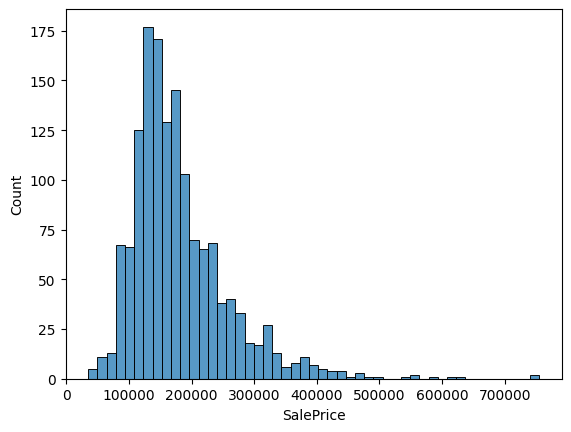

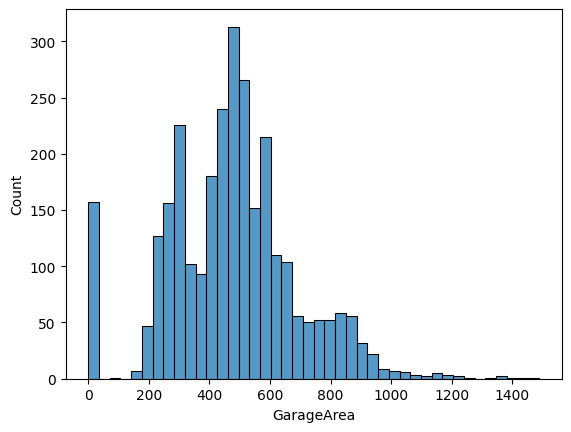

In [ ]:
#exploration
import matplotlib.pyplot as plt
import seaborn as sns

#examples:
#SalePrice distribution in all data?
col1 = 'SalePrice'
sns.histplot(combined_data[col1])
plt.show()

#Pool area?
col2 = 'GarageArea'
sns.histplot(combined_data[col2])
plt.show()

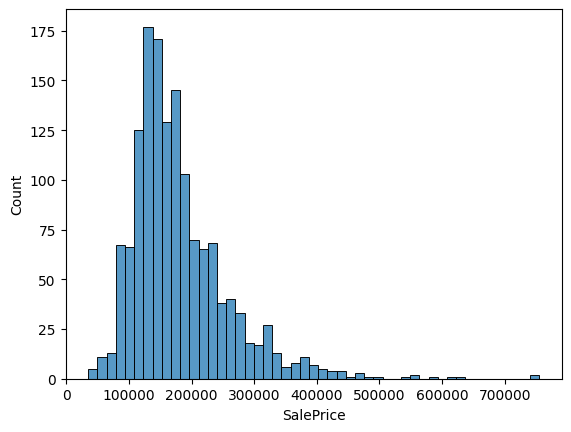

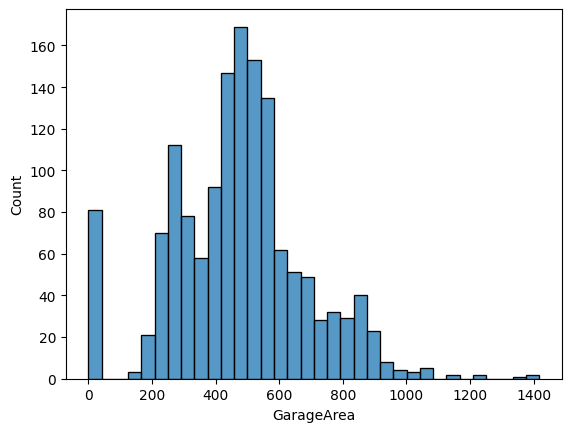

In [ ]:
#for only the train data :
#SalePrice distribution in train data?
col1 = 'SalePrice'
sns.histplot(train_dataset[col1])
plt.show()

#Pool area?
col2 = 'GarageArea'
sns.histplot(train_dataset[col2])
plt.show()

#looks the same...

columns in train_dataset with the greatest disparity (we'll maybe need to normalize)

In [ ]:
# standard deviation for each column of train_data
column_std = train_dataset.std()
# sorting columns based on st. dev (in descending order)
sorted_columns_by_std = column_std.sort_values(ascending=False)
# columns with the most disparity (highest st. dev)
print(sorted_columns_by_std.head(10))

SalePrice      79442.502883
LotArea         9981.264932
GrLivArea        525.480383
MiscVal          496.123024
BsmtFinSF1       456.098091
BsmtUnfSF        441.866955
TotalBsmtSF      438.705324
2ndFlrSF         436.528436
Id               421.610009
1stFlrSF         386.587738
dtype: float64


<ipython-input-165-443e13e4dcc3>:2: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



# Data cleansing and Preprocessing

- frequency of column values for specific columns, scaled logarithmically

Here, example with pool area (either there is a pool of varying area, either no pool in which case the value is 0.)

In [ ]:
import matplotlib.pyplot as plt
col = 'PoolArea'

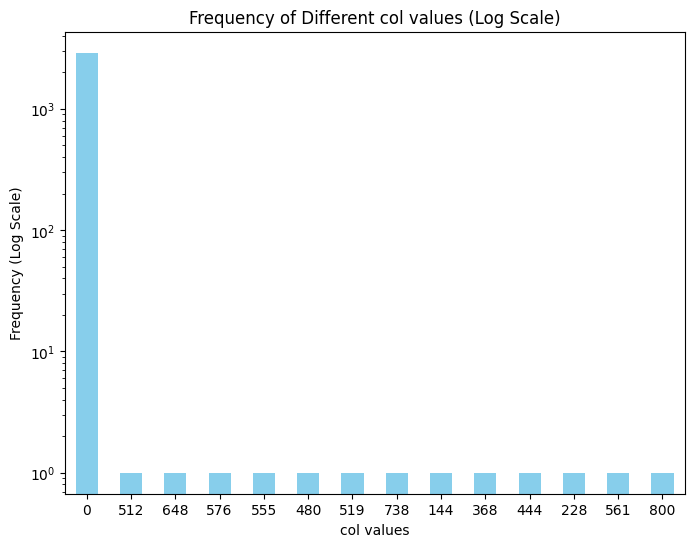

In [ ]:
# Get value counts of col
valuecounts = combined_data[col].value_counts()

# the bar plot with a logarithmic scale on the y-axis
plt.figure(figsize=(8, 6))
valuecounts.plot(kind='bar', color='skyblue')
plt.yscale('log')  # Use a logarithmic scale for y-axis
plt.title('Frequency of Different col values (Log Scale)')
plt.xlabel('col values')
plt.ylabel('Frequency (Log Scale)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
value_counts = combined_data[col].value_counts()
print(value_counts)

0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: PoolArea, dtype: int64


### 1. Dealing with the columns first

Taking away the non-negotiable constant-valued columns :

In [ ]:
constant_columns = combined_data.columns[combined_data.nunique() == 1]
combined_data = combined_data.drop(columns=constant_columns)

Taking a look at the presence of null values in columns first, before looking at the nulls per rows.

In [ ]:
# columns with missing values
columns_with_missing = combined_data.columns[combined_data.isnull().any()]
columns_with_missing

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


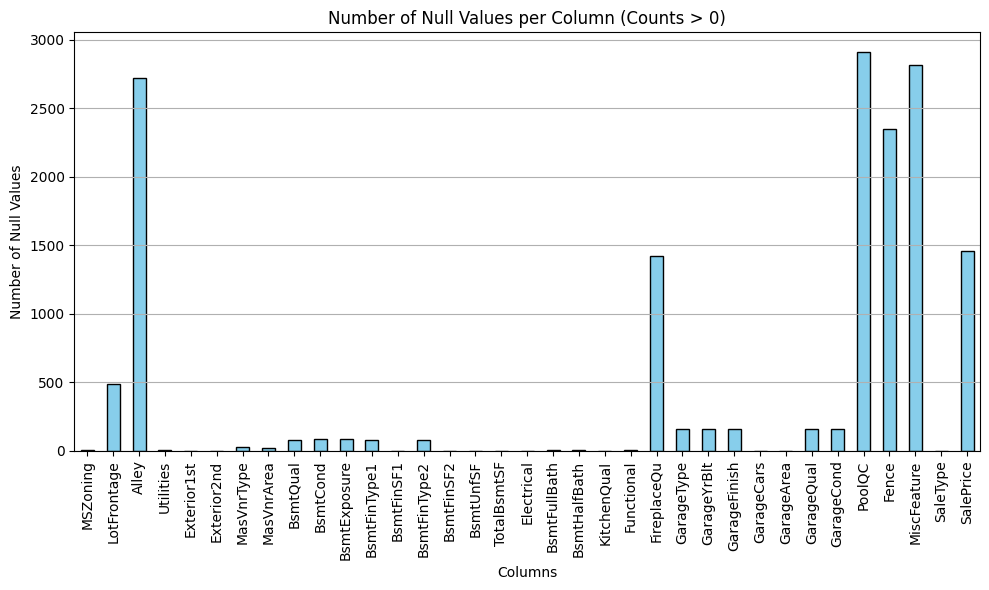

In [ ]:
#columns with nulls
number_of_nulls_per_column = combined_data.isnull().sum()
filtered_null_counts = number_of_nulls_per_column[number_of_nulls_per_column > 0]
print(filtered_null_counts)
#unimportant columns with too many null counts get removed.

#plotting the number of null values for each of the columns in the dataset.
plt.figure(figsize=(10, 6))
filtered_null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values per Column (Counts > 0)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Some columns here have way too many null values, which means that the data is incomplete for these. Obviously we are goign to keep the 'SalePrice' column (and instead remove the rows for which the price is missing...) for the others, such as Fence or MiscFeature, we are going to remove the column itself when the number of missing values exceed 10% of the total number of rows.

In [ ]:
# number of rows in combined_data
num_rows_combined_data = combined_data.shape[0]
# 10% of the number of rows
ten_percent = 0.1 * num_rows_combined_data
ten_percent

291.90000000000003

In [ ]:
columns_to_remove = filtered_null_counts[filtered_null_counts > ten_percent].index #columns with too many nulls
important_col = ['SalePrice'] #list of columns deemed important and unremovable for coherence
for col in important_col:
  if col in columns_to_remove:
      columns_to_remove = columns_to_remove.drop(col)
columns_to_remove #the columns left to remove from the whole combined dataset

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
#dropping the columns to remove from the combined data
combined_data = combined_data.drop(columns=columns_to_remove)
combined_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2006,WD,Normal,NaN,1
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2006,WD,Abnorml,NaN,1
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2006,WD,Abnorml,NaN,1
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,700,7,2006,WD,Normal,NaN,1


### 2. Null values in rows

- Taking away rows for which all values are null

In [ ]:
# remove rows where all values are null
subset = list(combined_data.columns)
subset.remove("SalePrice")
combined_data.dropna(inplace=True, subset = subset)
# reset index
combined_data.reset_index(drop=True, inplace=True)
combined_data[combined_data["dataset_type"] == 1]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
1338,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,120,0,0,6,2010,WD,Normal,NaN,1
1339,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,12500,6,2010,WD,Normal,NaN,1
1340,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2010,WD,Normal,NaN,1
1341,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2010,WD,Normal,NaN,1
1342,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,144,0,0,1,2010,WD,Normal,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,2912,20,RL,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,5,2006,WD,Normal,NaN,1
2653,2913,160,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,12,2006,WD,Abnorml,NaN,1
2654,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2006,WD,Abnorml,NaN,1
2655,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2006,WD,Abnorml,NaN,1


(No change in number of rows => luckily no empty rows)

### 3. Label Encoding

In [ ]:
#example: let's see the different options for 'Street' as categorical value
col = 'Street'
value_counts = combined_data[col].value_counts()
print(value_counts)

Pave    2648
Grvl       9
Name: Street, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

new_combined_data = combined_data.copy()  # copy to avoid modifying the original DataFrame
encoding_mappings = {}

# columns with categorical data (assuming they are object type)
categorical_columns = new_combined_data.select_dtypes(include=['object']).columns.tolist()

# Label Encoding to categorical columns
for col in categorical_columns:
    if col in new_combined_data.columns:
        label_encoder = LabelEncoder()
        new_combined_data[col] = label_encoder.fit_transform(new_combined_data[col].astype(str))
        encoding_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(encoding_mappings)

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}, 'Street': {'Grvl': 0, 'Pave': 1}, 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}, 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}, 'Utilities': {'AllPub': 0, 'NoSeWa': 1}, 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 'Neighborhood': {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}, 'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}, 'Condition2': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}, 'BldgType': {'1Fam': 0, '2fmCo

In [ ]:
new_combined_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,208500.0,0
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,181500.0,0
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,223500.0,0
3,4,70,3,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,140000.0,0
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,2912,20,3,13384,1,3,3,0,4,1,...,0,0,0,0,5,2006,8,4,NaN,1
2653,2913,160,4,1533,1,3,3,0,4,0,...,0,0,0,0,12,2006,8,0,NaN,1
2654,2916,160,4,1894,1,3,3,0,4,0,...,0,0,0,0,4,2006,8,0,NaN,1
2655,2917,20,3,20000,1,3,3,0,4,0,...,0,0,0,0,9,2006,8,0,NaN,1


To access the mappings :

In [ ]:
# access mappings for col
col = 'Street'
column_mappings = encoding_mappings[col]
column_mappings

{'Grvl': 0, 'Pave': 1}

In [ ]:
#Verify the former example, with different options for 'Street' but this time as encoded label now numerical value:
value_counts = new_combined_data[col].value_counts()
value_counts
#we get the same numbers, and we can see that the label is as such : 1: Pave, 0: Grvl (gravel)

1    2648
0       9
Name: Street, dtype: int64

So now, everything is in numerical value.

### 4. Normalization

In [ ]:
"""
# Perform necessary preprocessing steps such as normalization
scaler = StandardScaler()
# Assuming 'LotArea' is a numerical feature for normalization
new_combined_data['LotArea'] = scaler.fit_transform(combined_data[['LotArea']])
"""

"\n# Perform necessary preprocessing steps such as normalization\nscaler = StandardScaler()\n# Assuming 'LotArea' is a numerical feature for normalization\nnew_combined_data['LotArea'] = scaler.fit_transform(combined_data[['LotArea']])\n"

In [ ]:
# Perform necessary preprocessing steps such as normalization
scaler = StandardScaler()
# Assuming 'LotArea' is a numerical feature for normalization
new_combined_data['LotArea'] = scaler.fit_transform(new_combined_data[['LotArea']])

"""
# Separate train and test datasets after cleaning and preprocessing
train_dataset = combined_data[combined_data["dataset_type"] == 0]
test_dataset = combined_data[combined_data["dataset_type"] == 1]

# Display train and test datasets after preprocessing
print("\nTrain Dataset after Preprocessing:")
print(train_dataset)
print("\nTest Dataset after Preprocessing:")
print(test_dataset)
"""

'\n# Separate train and test datasets after cleaning and preprocessing\ntrain_dataset = combined_data[combined_data["dataset_type"] == 0]\ntest_dataset = combined_data[combined_data["dataset_type"] == 1]\n\n# Display train and test datasets after preprocessing\nprint("\nTrain Dataset after Preprocessing:")\nprint(train_dataset)\nprint("\nTest Dataset after Preprocessing:")\nprint(test_dataset)\n'

### 5. Reseparate the test and train datasets

Separation fo the initial datasets following the value in the dataset_type column, created in order to keep track of each row's appartenance before the combination of the two original datasets, train_dataset and test_dataset.

In [ ]:
# separate combined_data into train and test datasets. 0: train, 1: test
train_dataset = new_combined_data[new_combined_data['dataset_type'] == 0].drop(columns='dataset_type')
test_dataset = new_combined_data[new_combined_data['dataset_type'] == 1].drop(columns='dataset_type')
#also dropping the now useless dataset_type column in both datasets


# reset the indices for both datasets
train_dataset.reset_index(drop=True, inplace=True)
test_dataset.reset_index(drop=True, inplace=True)


## Analysis of correlation

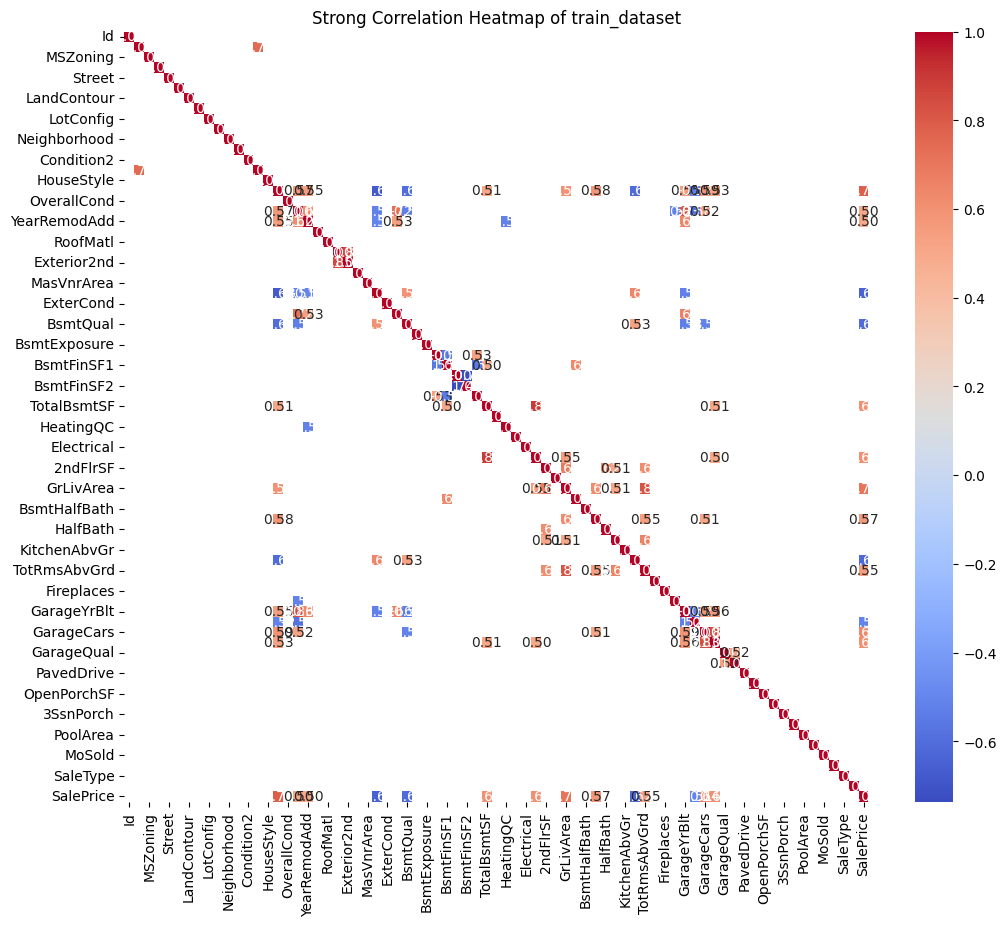

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_dataset.corr()

# larger heatmap
plt.figure(figsize=(12, 10))

# correlations below a certain threshold (adjust as needed)
threshold = 0.5  # You can adjust this threshold
high_corr = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# heatmap for strong correlations
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Strong Correlation Heatmap of train_dataset')
plt.show()


We can afford to use all of the columns, as none are extremely correlated.
We can interestingly see that there are certain columns that strongly influence the price of the house (SalePrice), for example the elements regarding the Garage, or the presence of a second floor.

# Random Forest Predictions



First, to use the Random Forest algorithm, we import all the libraries needed, and also the libraries used to make some graphs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

We split the train dataset into two dataset, one for the training and the other to test the accuracy of the model before using it for the predictions

We test it with several values for the n_estimators in order to use a good one

In [ ]:
train_data, test_data = train_test_split(train_dataset, test_size=0.2, random_state=42)  # I split the train into 2 parts to test its accuracy

X_train = train_data.drop("SalePrice", axis=1)
Y_train = train_data["SalePrice"]

X_test = test_data.drop("SalePrice", axis=1)
Y_test = test_data["SalePrice"]

for i in [50, 100, 200, 500]:
    print ('n_estimator = ')
    print(i)
    model = RandomForestRegressor(n_estimators= i, random_state=42)  #I train the model using the train data
    model.fit(X_train, Y_train)

    print('model score =')
    print(model.score(X_test,Y_test))    # I look the score of the model to check its accuracy

    predictions_validation = model.predict(X_test)

    mse_validation = mean_squared_error(Y_test, predictions_validation)
    print(f"Mean quadratic error is : {mse_validation}")
    print('the rmse is')
    print(sqrt(mse_validation))



n_estimator = 
50
model score =
0.8330055772558067
Mean quadratic error is : 714586837.5241045
 the rmse is
26731.757097581605
n_estimator = 
100
model score =
0.8315651832799476
Mean quadratic error is : 720750436.0388564
 the rmse is
26846.795638192212
n_estimator = 
200
model score =
0.8339041623212914
Mean quadratic error is : 710741696.7724596
 the rmse is
26659.73924802078
n_estimator = 
500
model score =
0.8349731299876493
Mean quadratic error is : 706167470.8099058
 the rmse is
26573.811747845015


We see that the best n_estimator is 500, so we will keep it for the predictions.

The current model accuracy is :

In [ ]:
print(model.score(X_test,Y_test))

predictions_validation = model.predict(X_test)
mse_validation = mean_squared_error(Y_test, predictions_validation)
print (f'the square root of the quadradic error is {(sqrt(mse_validation))}')


0.8349731299876493
the square root of the quadradic error is 26573.811747845015


We know draw a graph to show the predictions compared to the real saleprice

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_data.SalePrice, y=test_data.SalePrice, mode='lines', name='SalePrice', line=dict(color='red')))

fig.add_trace(go.Scatter(x=test_data.SalePrice, y=predictions_validation, mode='markers', name='Predictions', marker=dict(color='blue')))


fig.update_layout(
    title='Predictions by the real sale price',
    xaxis_title='SalePrice',
    yaxis_title='Price',
    showlegend=True,
    legend=dict(x=0, y=1)
)

Finally, we use the model to make the predictions

In [ ]:

prediction = model.predict(test_dataset.drop("SalePrice", axis = 1))
print(prediction)

[126652.226 157224.5   182030.85  ...  85876.182 154779.996 225607.89 ]


# XGBoost Predictions

In [ ]:
X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)

X_test_array = np.array(X_test)
Y_test_array = np.array(Y_test)

data_train = xgb.DMatrix(X_train_array, label = Y_train_array)
data_test = xgb.DMatrix(X_test_array, label = Y_test_array)

params = [
    {'max_depth': 2, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 4, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 6, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 8, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 10, 'eta': 0.01, 'device':'gpu'}
    ] # eta is the learning rate


numRound = 100
evallist = [(data_train, 'train'), (data_test, 'eval')]
models = []
c=1
for i in params:

  models.append(xgb.train(i, data_train, numRound, evallist, early_stopping_rounds=10))
  print(f"End of training model {c}")
  c+=1



[0]	train-rmse:81275.67164	eval-rmse:65723.73436
[1]	train-rmse:80769.51613	eval-rmse:65274.35110
[2]	train-rmse:80269.30129	eval-rmse:64847.22342
[3]	train-rmse:79775.77816	eval-rmse:64409.48031
[4]	train-rmse:79288.07827	eval-rmse:63993.74756
[5]	train-rmse:78806.94237	eval-rmse:63567.43256
[6]	train-rmse:78331.51029	eval-rmse:63162.87491
[7]	train-rmse:77862.52165	eval-rmse:62747.77530
[8]	train-rmse:77399.11382	eval-rmse:62354.18104
[9]	train-rmse:76941.50066	eval-rmse:61909.76960
[10]	train-rmse:76489.10068	eval-rmse:61526.57381
[11]	train-rmse:76042.40872	eval-rmse:61093.33827
[12]	train-rmse:75600.80762	eval-rmse:60720.34422
[13]	train-rmse:75164.82572	eval-rmse:60298.08277
[14]	train-rmse:74733.79640	eval-rmse:59934.80783
[15]	train-rmse:74308.01693	eval-rmse:59520.42630
[16]	train-rmse:73887.49436	eval-rmse:59151.40372
[17]	train-rmse:73471.54566	eval-rmse:58775.02147
[18]	train-rmse:73061.19721	eval-rmse:58415.79827
[19]	train-rmse:72655.29552	eval-rmse:58040.10815
[20]	train

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning:

Pass `evals` as keyword args.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:09] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[40]	train-rmse:65118.10707	eval-rmse:51503.77774
[41]	train-rmse:64792.99264	eval-rmse:51262.07773
[42]	train-rmse:64480.08498	eval-rmse:50976.48901
[43]	train-rmse:64161.61500	eval-rmse:50758.93430
[44]	train-rmse:63855.05718	eval-rmse:50487.16537
[45]	train-rmse:63523.65185	eval-rmse:50214.86176
[46]	train-rmse:63215.25915	eval-rmse:50005.58662
[47]	train-rmse:62907.78603	eval-rmse:49721.06246
[48]	train-rmse:62586.55193	eval-rmse:49453.24783
[49]	train-rmse:62269.35685	eval-rmse:49193.70378
[50]	train-rmse:61979.46137	eval-rmse:48959.25510
[51]	train-rmse:61669.26308	eval-rmse:48722.54951
[52]	train-rmse:61376.33316	eval-rmse:48456.60117
[53]	train-rmse:61072.06916	eval-rmse:48203.87728
[54]	train-rmse:60793.35812	eval-rmse:47991.31468
[55]	train-rmse:60495.36137	eval-rmse:47761.77886
[56]	train-rmse:60213.67768	eval-rmse:47574.33091
[57]	train-rmse:59934.18767	eval-rmse:47317.59762
[58]	train-rmse:59644.67461	eval-rmse:47099.32170
[59]	train-rmse:59371.54805	eval-rmse:46918.89057


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:10] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[23]	train-rmse:68195.99079	eval-rmse:55248.13104
[24]	train-rmse:67707.53637	eval-rmse:54858.19150
[25]	train-rmse:67196.30008	eval-rmse:54487.16554
[26]	train-rmse:66691.43428	eval-rmse:54105.24081
[27]	train-rmse:66216.25245	eval-rmse:53739.27716
[28]	train-rmse:65720.29365	eval-rmse:53367.61673
[29]	train-rmse:65229.89074	eval-rmse:53015.61418
[30]	train-rmse:64748.24348	eval-rmse:52647.95336
[31]	train-rmse:64289.77123	eval-rmse:52294.73526
[32]	train-rmse:63809.86764	eval-rmse:51936.76791
[33]	train-rmse:63341.61808	eval-rmse:51609.77919
[34]	train-rmse:62878.26688	eval-rmse:51275.24410
[35]	train-rmse:62417.12782	eval-rmse:50927.54215
[36]	train-rmse:61960.94763	eval-rmse:50588.02722
[37]	train-rmse:61509.71728	eval-rmse:50251.48910
[38]	train-rmse:61064.17954	eval-rmse:49925.97894
[39]	train-rmse:60643.62757	eval-rmse:49613.59882
[40]	train-rmse:60210.03180	eval-rmse:49287.92242
[41]	train-rmse:59772.74023	eval-rmse:48968.67992
[42]	train-rmse:59341.80023	eval-rmse:48681.68355


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:11] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[15]	train-rmse:71642.87023	eval-rmse:58475.07218
[16]	train-rmse:71062.00747	eval-rmse:58047.38182
[17]	train-rmse:70485.24824	eval-rmse:57587.76067
[18]	train-rmse:69915.56046	eval-rmse:57164.87708
[19]	train-rmse:69351.14860	eval-rmse:56741.33941
[20]	train-rmse:68792.64394	eval-rmse:56306.64225
[21]	train-rmse:68240.41899	eval-rmse:55896.13078
[22]	train-rmse:67692.55261	eval-rmse:55469.40962
[23]	train-rmse:67152.22098	eval-rmse:55067.42229
[24]	train-rmse:66614.14368	eval-rmse:54658.19051
[25]	train-rmse:66082.76343	eval-rmse:54270.83705
[26]	train-rmse:65555.87323	eval-rmse:53865.62559
[27]	train-rmse:65029.61801	eval-rmse:53489.39267
[28]	train-rmse:64513.08796	eval-rmse:53098.59340
[29]	train-rmse:63998.68006	eval-rmse:52734.65699
[30]	train-rmse:63487.07894	eval-rmse:52352.67357
[31]	train-rmse:62982.11549	eval-rmse:52006.03647
[32]	train-rmse:62483.87940	eval-rmse:51655.84925
[33]	train-rmse:61985.83401	eval-rmse:51289.32593
[34]	train-rmse:61495.14293	eval-rmse:50950.21183


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:12] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[10]	train-rmse:74449.62639	eval-rmse:60780.09495
[11]	train-rmse:73820.37295	eval-rmse:60320.84753
[12]	train-rmse:73197.42399	eval-rmse:59871.07264
[13]	train-rmse:72580.06770	eval-rmse:59423.05323
[14]	train-rmse:71969.44066	eval-rmse:58985.90254
[15]	train-rmse:71364.86711	eval-rmse:58557.57396
[16]	train-rmse:70766.12998	eval-rmse:58146.43493
[17]	train-rmse:70172.75498	eval-rmse:57738.06534
[18]	train-rmse:69583.94034	eval-rmse:57328.46052
[19]	train-rmse:69001.63665	eval-rmse:56943.22010
[20]	train-rmse:68425.02784	eval-rmse:56518.63282
[21]	train-rmse:67854.02326	eval-rmse:56118.69422
[22]	train-rmse:67286.28743	eval-rmse:55703.54436
[23]	train-rmse:66725.15916	eval-rmse:55309.87545
[24]	train-rmse:66170.08089	eval-rmse:54909.65310
[25]	train-rmse:65620.76954	eval-rmse:54529.85977
[26]	train-rmse:65076.70345	eval-rmse:54176.71798
[27]	train-rmse:64536.16500	eval-rmse:53793.03349
[28]	train-rmse:64003.45373	eval-rmse:53418.16386
[29]	train-rmse:63473.43633	eval-rmse:53062.34929


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:14] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[7]	train-rmse:76330.01193	eval-rmse:62240.83336
[8]	train-rmse:75676.83789	eval-rmse:61777.46166
[9]	train-rmse:75030.47243	eval-rmse:61319.40549
[10]	train-rmse:74389.81078	eval-rmse:60861.99816
[11]	train-rmse:73755.49567	eval-rmse:60407.69334
[12]	train-rmse:73126.07412	eval-rmse:59945.47418
[13]	train-rmse:72503.92241	eval-rmse:59495.79883
[14]	train-rmse:71886.63296	eval-rmse:59057.69595
[15]	train-rmse:71275.53274	eval-rmse:58628.77420
[16]	train-rmse:70670.51962	eval-rmse:58211.81043
[17]	train-rmse:70071.01699	eval-rmse:57801.83724
[18]	train-rmse:69477.14206	eval-rmse:57388.09855
[19]	train-rmse:68888.81373	eval-rmse:57006.06613
[20]	train-rmse:68305.08678	eval-rmse:56602.73192
[21]	train-rmse:67728.33102	eval-rmse:56216.09054
[22]	train-rmse:67156.72136	eval-rmse:55843.82620
[23]	train-rmse:66589.38716	eval-rmse:55438.64039
[24]	train-rmse:66028.96057	eval-rmse:55069.78177
[25]	train-rmse:65472.76651	eval-rmse:54678.32472
[26]	train-rmse:64922.16962	eval-rmse:54324.03978
[27

In [ ]:
for i in range(len(models)):
  print(f"model {i} : {models[i].best_score}")

model 0 : 40241.13270978355
model 1 : 36158.28363166466
model 2 : 35690.75433157066
model 3 : 35718.655859344595
model 4 : 36314.161814976425


We can see the best models are the third and fourth. Let's tune parameters to get even better model.

In [ ]:
params = [
    {'max_depth': 8, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 9, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 10, 'eta': 0.01, 'device':'gpu'}
    ]

numRound = 100
evallist = [(data_train, 'train'), (data_test, 'eval')]
models = []
c=1
for i in params:

  models.append(xgb.train(i, data_train, numRound, evallist, early_stopping_rounds=10))
  print(f"End of training model {c}")
  c+=1

[0]	train-rmse:81088.55054	eval-rmse:65660.67476
[1]	train-rmse:80395.37609	eval-rmse:65147.47531
[2]	train-rmse:79709.06832	eval-rmse:64642.63928
[3]	train-rmse:79028.31763	eval-rmse:64140.42858


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:17] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[4]	train-rmse:78355.68298	eval-rmse:63650.22920
[5]	train-rmse:77688.04010	eval-rmse:63163.64637
[6]	train-rmse:77027.29647	eval-rmse:62681.54375
[7]	train-rmse:76372.50072	eval-rmse:62190.22215
[8]	train-rmse:75725.97655	eval-rmse:61721.34279
[9]	train-rmse:75084.26359	eval-rmse:61248.16066
[10]	train-rmse:74449.62639	eval-rmse:60780.09495
[11]	train-rmse:73820.37295	eval-rmse:60320.84753
[12]	train-rmse:73197.42399	eval-rmse:59871.07264
[13]	train-rmse:72580.06770	eval-rmse:59423.05323
[14]	train-rmse:71969.44066	eval-rmse:58985.90254
[15]	train-rmse:71364.86711	eval-rmse:58557.57396
[16]	train-rmse:70766.12998	eval-rmse:58146.43493
[17]	train-rmse:70172.75498	eval-rmse:57738.06534
[18]	train-rmse:69583.94034	eval-rmse:57328.46052
[19]	train-rmse:69001.63665	eval-rmse:56943.22010
[20]	train-rmse:68425.02784	eval-rmse:56518.63282
[21]	train-rmse:67854.02326	eval-rmse:56118.69422
[22]	train-rmse:67286.28743	eval-rmse:55703.54436
[23]	train-rmse:66725.15916	eval-rmse:55309.87545
[24]	t

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:23] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[3]	train-rmse:79013.71535	eval-rmse:64145.09002
[4]	train-rmse:78337.23363	eval-rmse:63660.97832
[5]	train-rmse:77666.55760	eval-rmse:63177.15890
[6]	train-rmse:77002.32833	eval-rmse:62690.23399
[7]	train-rmse:76344.58564	eval-rmse:62218.82797
[8]	train-rmse:75693.43207	eval-rmse:61747.67526
[9]	train-rmse:75048.80292	eval-rmse:61288.39451
[10]	train-rmse:74409.00810	eval-rmse:60813.66967
[11]	train-rmse:73776.50296	eval-rmse:60356.32505
[12]	train-rmse:73149.05533	eval-rmse:59895.09634
[13]	train-rmse:72528.38771	eval-rmse:59440.34279
[14]	train-rmse:71912.90230	eval-rmse:59001.76393
[15]	train-rmse:71303.40632	eval-rmse:58570.69791
[16]	train-rmse:70700.51158	eval-rmse:58153.11317
[17]	train-rmse:70103.10617	eval-rmse:57746.46878
[18]	train-rmse:69510.68667	eval-rmse:57336.96678
[19]	train-rmse:68924.36949	eval-rmse:56956.88687
[20]	train-rmse:68342.71859	eval-rmse:56540.58749
[21]	train-rmse:67767.63434	eval-rmse:56148.99104
[22]	train-rmse:67197.68440	eval-rmse:55773.01154
[23]	tr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:27] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[3]	train-rmse:79005.80592	eval-rmse:64158.84065
[4]	train-rmse:78327.20962	eval-rmse:63675.24653
[5]	train-rmse:77655.17127	eval-rmse:63194.23493
[6]	train-rmse:76989.23222	eval-rmse:62713.99393
[7]	train-rmse:76330.01193	eval-rmse:62240.83336
[8]	train-rmse:75676.83789	eval-rmse:61777.46166
[9]	train-rmse:75030.47243	eval-rmse:61319.40549
[10]	train-rmse:74389.81078	eval-rmse:60861.99816
[11]	train-rmse:73755.49567	eval-rmse:60407.69334
[12]	train-rmse:73126.07412	eval-rmse:59945.47418
[13]	train-rmse:72503.92241	eval-rmse:59495.79883
[14]	train-rmse:71886.63296	eval-rmse:59057.69595
[15]	train-rmse:71275.53274	eval-rmse:58628.77420
[16]	train-rmse:70670.51962	eval-rmse:58211.81043
[17]	train-rmse:70071.01699	eval-rmse:57801.83724
[18]	train-rmse:69477.14206	eval-rmse:57388.09855
[19]	train-rmse:68888.81373	eval-rmse:57006.06613
[20]	train-rmse:68305.08678	eval-rmse:56602.73192
[21]	train-rmse:67728.33102	eval-rmse:56216.09054
[22]	train-rmse:67156.72136	eval-rmse:55843.82620
[23]	tr

In [ ]:
for i in range(len(models)):
  print(f"model {i+1} : {models[i].best_score}")

model 1 : 35718.655859344595
model 2 : 36001.279086117895
model 3 : 36314.161814976425


We can see the best model is with 8 depth.

In [ ]:
params = [
    {'max_depth': 8, 'eta': 0.01, 'device':'gpu'},
    {'max_depth': 8, 'eta': 0.1, 'device':'gpu'},
    {'max_depth': 8, 'eta': 1, 'device':'gpu'}
    ]

numRound = 100
evallist = [(data_train, 'train'), (data_test, 'eval')]
models = []
c=1
for i in params:

  models.append(xgb.train(i, data_train, numRound, evallist, early_stopping_rounds=10))
  print(f"End of training model {c}")
  c+=1

print("\n\nEnd of Training \n\n")
for i in range(len(models)):
  print(f"model {i} : {models[i].best_score}")

[0]	train-rmse:81088.55054	eval-rmse:65660.67476
[1]	train-rmse:80395.37609	eval-rmse:65147.47531
[2]	train-rmse:79709.06832	eval-rmse:64642.63928
[3]	train-rmse:79028.31763	eval-rmse:64140.42858
[4]	train-rmse:78355.68298	eval-rmse:63650.22920
[5]	train-rmse:77688.04010	eval-rmse:63163.64637
[6]	train-rmse:77027.29647	eval-rmse:62681.54375
[7]	train-rmse:76372.50072	eval-rmse:62190.22215
[8]	train-rmse:75725.97655	eval-rmse:61721.34279
[9]	train-rmse:75084.26359	eval-rmse:61248.16066
[10]	train-rmse:74449.62639	eval-rmse:60780.09495


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:30] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[11]	train-rmse:73820.37295	eval-rmse:60320.84753
[12]	train-rmse:73197.42399	eval-rmse:59871.07264
[13]	train-rmse:72580.06770	eval-rmse:59423.05323
[14]	train-rmse:71969.44066	eval-rmse:58985.90254
[15]	train-rmse:71364.86711	eval-rmse:58557.57396
[16]	train-rmse:70766.12998	eval-rmse:58146.43493
[17]	train-rmse:70172.75498	eval-rmse:57738.06534
[18]	train-rmse:69583.94034	eval-rmse:57328.46052
[19]	train-rmse:69001.63665	eval-rmse:56943.22010
[20]	train-rmse:68425.02784	eval-rmse:56518.63282
[21]	train-rmse:67854.02326	eval-rmse:56118.69422
[22]	train-rmse:67286.28743	eval-rmse:55703.54436
[23]	train-rmse:66725.15916	eval-rmse:55309.87545
[24]	train-rmse:66170.08089	eval-rmse:54909.65310
[25]	train-rmse:65620.76954	eval-rmse:54529.85977
[26]	train-rmse:65076.70345	eval-rmse:54176.71798
[27]	train-rmse:64536.16500	eval-rmse:53793.03349
[28]	train-rmse:64003.45373	eval-rmse:53418.16386
[29]	train-rmse:63473.43633	eval-rmse:53062.34929
[30]	train-rmse:62949.55359	eval-rmse:52699.06937


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[8]	train-rmse:37673.73269	eval-rmse:36714.92596
[9]	train-rmse:34655.17643	eval-rmse:34992.48929
[10]	train-rmse:31967.70979	eval-rmse:33879.99845
[11]	train-rmse:29429.71406	eval-rmse:32864.50754
[12]	train-rmse:27137.56057	eval-rmse:31971.40521
[13]	train-rmse:25061.81784	eval-rmse:31183.83950
[14]	train-rmse:23130.06757	eval-rmse:30531.99365
[15]	train-rmse:21445.66276	eval-rmse:29917.09987
[16]	train-rmse:19888.63975	eval-rmse:29452.65751
[17]	train-rmse:18464.00373	eval-rmse:29004.44659
[18]	train-rmse:17150.99563	eval-rmse:28560.20412
[19]	train-rmse:15966.05408	eval-rmse:28258.36212
[20]	train-rmse:14889.55588	eval-rmse:28013.88023
[21]	train-rmse:13901.19107	eval-rmse:27768.89845
[22]	train-rmse:12968.04767	eval-rmse:27533.09854
[23]	train-rmse:12126.40921	eval-rmse:27358.72872
[24]	train-rmse:11371.14094	eval-rmse:27238.63728
[25]	train-rmse:10665.59824	eval-rmse:27068.15078
[26]	train-rmse:10024.51543	eval-rmse:26945.24944
[27]	train-rmse:9435.05085	eval-rmse:26934.61615
[28

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:40] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[6]	train-rmse:5375.38685	eval-rmse:33966.09478
[7]	train-rmse:4359.60723	eval-rmse:33982.78085
[8]	train-rmse:3485.65499	eval-rmse:34116.80356
[9]	train-rmse:2606.84792	eval-rmse:34292.82156
[10]	train-rmse:2199.04554	eval-rmse:34520.42986
[11]	train-rmse:1825.91095	eval-rmse:34415.65979
[12]	train-rmse:1446.93233	eval-rmse:34350.74239
End of training model 3


End of Training 


model 0 : 35718.655859344595
model 1 : 26114.296621474572
model 2 : 33410.983456906215


It looks like the model is better when the learning rate is around 0.1 let see if we can have better performance.

In [ ]:
params = [
    {'max_depth': 8, 'eta': 0.1, 'device':'gpu'},
    {'max_depth': 8, 'eta': 0.2, 'device':'gpu'},
    {'max_depth': 8, 'eta': 0.3, 'device':'gpu'},
    {'max_depth': 8, 'eta': 0.4, 'device':'gpu'},
    ]

numRound = 100
evallist = [(data_train, 'train'), (data_test, 'eval')]
models = []
c=1
for i in params:

  models.append(xgb.train(i, data_train, numRound, evallist, early_stopping_rounds=5))
  print(f"End of training model {c}")
  c+=1

print("\n\nEnd of Training \n\n")
for i in range(len(models)):
  print(f"model {i+1} : best score : {models[i].best_score}")

[0]	train-rmse:74810.75638	eval-rmse:61067.72730
[1]	train-rmse:68516.94437	eval-rmse:56518.67777
[2]	train-rmse:62794.56020	eval-rmse:52329.27937
[3]	train-rmse:57611.62881	eval-rmse:48996.96640
[4]	train-rmse:52908.93874	eval-rmse:45745.89131
[5]	train-rmse:48637.73828	eval-rmse:43067.33353
[6]	train-rmse:44735.47036	eval-rmse:40872.13602
[7]	train-rmse:41045.88392	eval-rmse:38649.56425
[8]	train-rmse:37673.73269	eval-rmse:36714.92596
[9]	train-rmse:34655.17643	eval-rmse:34992.48929


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:41] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[10]	train-rmse:31967.70979	eval-rmse:33879.99845
[11]	train-rmse:29429.71406	eval-rmse:32864.50754
[12]	train-rmse:27137.56057	eval-rmse:31971.40521
[13]	train-rmse:25061.81784	eval-rmse:31183.83950
[14]	train-rmse:23130.06757	eval-rmse:30531.99365
[15]	train-rmse:21445.66276	eval-rmse:29917.09987
[16]	train-rmse:19888.63975	eval-rmse:29452.65751
[17]	train-rmse:18464.00373	eval-rmse:29004.44659
[18]	train-rmse:17150.99563	eval-rmse:28560.20412
[19]	train-rmse:15966.05408	eval-rmse:28258.36212
[20]	train-rmse:14889.55588	eval-rmse:28013.88023
[21]	train-rmse:13901.19107	eval-rmse:27768.89845
[22]	train-rmse:12968.04767	eval-rmse:27533.09854
[23]	train-rmse:12126.40921	eval-rmse:27358.72872
[24]	train-rmse:11371.14094	eval-rmse:27238.63728
[25]	train-rmse:10665.59824	eval-rmse:27068.15078
[26]	train-rmse:10024.51543	eval-rmse:26945.24944
[27]	train-rmse:9435.05085	eval-rmse:26934.61615
[28]	train-rmse:8891.84338	eval-rmse:26870.63589
[29]	train-rmse:8388.69445	eval-rmse:26756.58366
[30

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:43] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[4]	train-rmse:33190.59493	eval-rmse:35015.46269
[5]	train-rmse:27937.54139	eval-rmse:32765.98375
[6]	train-rmse:23753.84380	eval-rmse:31194.54694
[7]	train-rmse:20245.38832	eval-rmse:29849.36930
[8]	train-rmse:17330.34796	eval-rmse:28853.81642
[9]	train-rmse:14988.32542	eval-rmse:28368.20761
[10]	train-rmse:13026.83290	eval-rmse:27765.83023
[11]	train-rmse:11355.45036	eval-rmse:27332.34318
[12]	train-rmse:9966.45027	eval-rmse:26928.11015
[13]	train-rmse:8791.03907	eval-rmse:26795.36156
[14]	train-rmse:7844.28613	eval-rmse:26684.81847
[15]	train-rmse:7077.99695	eval-rmse:26611.99646
[16]	train-rmse:6383.56661	eval-rmse:26494.63272
[17]	train-rmse:5796.66885	eval-rmse:26439.18308
[18]	train-rmse:5305.76106	eval-rmse:26411.67038
[19]	train-rmse:4912.04409	eval-rmse:26367.84668
[20]	train-rmse:4578.31329	eval-rmse:26274.09796
[21]	train-rmse:4295.89550	eval-rmse:26192.79433
[22]	train-rmse:4040.80126	eval-rmse:26140.96204
[23]	train-rmse:3814.50950	eval-rmse:26109.65468
[24]	train-rmse:36

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:44] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[7]	train-rmse:10885.13316	eval-rmse:27125.50810
[8]	train-rmse:9047.00583	eval-rmse:27085.77840
[9]	train-rmse:7585.15361	eval-rmse:26804.75326
[10]	train-rmse:6581.29736	eval-rmse:26801.25855
[11]	train-rmse:5754.74191	eval-rmse:26674.40180
[12]	train-rmse:5098.22814	eval-rmse:26672.57871
[13]	train-rmse:4619.10359	eval-rmse:26618.35713
[14]	train-rmse:4270.28614	eval-rmse:26598.27109
[15]	train-rmse:4015.54760	eval-rmse:26481.06590
[16]	train-rmse:3745.03517	eval-rmse:26479.45176
[17]	train-rmse:3546.83254	eval-rmse:26437.21422
[18]	train-rmse:3272.77545	eval-rmse:26454.45088
[19]	train-rmse:3159.16980	eval-rmse:26423.64968
[20]	train-rmse:2948.76570	eval-rmse:26407.70802
[21]	train-rmse:2749.59456	eval-rmse:26385.66596
[22]	train-rmse:2643.01511	eval-rmse:26371.32042
[23]	train-rmse:2423.18754	eval-rmse:26383.06626
[24]	train-rmse:2332.73461	eval-rmse:26373.59174
[25]	train-rmse:2291.90537	eval-rmse:26345.46785
[26]	train-rmse:2210.80314	eval-rmse:26345.91722
[27]	train-rmse:2149.5

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:52:45] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



[7]	train-rmse:6700.34536	eval-rmse:27751.26131
[8]	train-rmse:5668.42640	eval-rmse:27483.64682
[9]	train-rmse:5013.14101	eval-rmse:27400.82652
[10]	train-rmse:4500.39002	eval-rmse:27442.48113
[11]	train-rmse:4159.29421	eval-rmse:27357.37041
[12]	train-rmse:4001.55616	eval-rmse:27287.39882
[13]	train-rmse:3657.64425	eval-rmse:27313.18078
[14]	train-rmse:3420.56139	eval-rmse:27302.68896
[15]	train-rmse:3170.27727	eval-rmse:27255.99433
[16]	train-rmse:2853.56681	eval-rmse:27280.67414
[17]	train-rmse:2715.54108	eval-rmse:27282.46420
[18]	train-rmse:2571.15889	eval-rmse:27231.29216
[19]	train-rmse:2279.87052	eval-rmse:27168.40874
[20]	train-rmse:2025.70422	eval-rmse:27150.86923
[21]	train-rmse:1888.74783	eval-rmse:27170.66281
[22]	train-rmse:1726.22018	eval-rmse:27167.73466
[23]	train-rmse:1570.41961	eval-rmse:27174.02625
[24]	train-rmse:1348.48819	eval-rmse:27209.07796
[25]	train-rmse:1215.46256	eval-rmse:27213.56867
End of training model 4


End of Training 


model 1 : best score : 2611

Our best model is the second one so let's continue with this one.

In [ ]:
final_model = models[1]

print(final_model.attributes())


{'best_iteration': '34', 'best_score': '25968.038763420638'}


In [ ]:
test_data_input = xgb.DMatrix(np.array(test_dataset.drop("SalePrice", axis = 1)))
preds = final_model.predict(test_data_input)
print(preds)


test_preds = final_model.predict(data_test)
test_data['predictions'] = test_preds

[127533.234 164920.16  192892.31  ...  75335.49  172906.92  204549.   ]


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_data.SalePrice, y=test_data.SalePrice, mode='lines', name='SalePrice', line=dict(color='red')))

# Ajouter la ligne pour 'Estimation'
fig.add_trace(go.Scatter(x=test_data.SalePrice, y=test_data.predictions, mode='markers', name='Predictions', marker=dict(color='blue')))


# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Predictions by the real sale price',
    xaxis_title='SalePrice',
    yaxis_title='Price',
    showlegend=True,
    legend=dict(x=0, y=1)
)

We can see this model is precise around house prices between 100k and 200k.

Out of this thresold we can see the error is bigger.